<div align="center">
    <h1>Deep Reinforcment Learning using LSTM</h1>
    <h3> Weizmann AI Hub for Scientific Discovery </h3>
    <h4>Tamir Scherf</h4>
    tamir.scherf@weizmann.ac.il
    <p>Spring semester 2024</p>
</div>




# Introduction
In this tutorial, we will learn about Reinforcement Learning (RL), Deep Reinforcement Learning (deep RL), and Long Short-Term Memory (LSTM) neural networks. We will implement Q-learning and Actor-Critic models to perform different Multi-Armed Bandit tasks. For each model, we will compare the model’s performance with human subjects' behavior and see how likely the model is to perform as the subjects do.

Do all these terms sound like a recipe for a major headache? Good! Let’s break it all down one by one 😊


# Restless Multi-armed Bandit (RMAB)

We will start by understanding the task that we want our artificial agents and subjects to perform by performing it ourselves. Please run 'RMAB.m' file within 'Task' directory, using Matlab to play the game, and come back here afterward.


<div class="alert alert-block alert-info">
<b>Play the game!</b>
Run 'RMAB.m' file using matlab to play the game!
</div>

The task you just played is a restless three-armed bandit task, which is one type of many formulations of bandit tasks. In general, multi-armed bandit tasks involve choosing from multiple options (arms) with unknown reward probabilities to maximize total reward through exploration and exploitation. In our formulation, the value of the arms changes during the episode (an episode contains 200 trials), and when choosing a machine, you are guaranteed to collect its outcome. The magnitude of each arm is constantly changing as it follows different sine-wave functions with added noise. Here is an example of the underlying sine-wave reward functions of the arms in the game you played:

![Logo](Tutorial_images/rew_functions_fig.jpg)

Multi-armed bandit tasks are studied in many fields of research, and we use them in our lab to study human behavior and the neural mechanisms underlying it. In this exercise, we will use a dataset of 31 subjects playing the RMAB. The dataset also contains their fMRI brain activity while they perform the task, but for this exercise, we will only use their behavior. If you are interested in further information about the experiment, check out this [paper](https://www.nature.com/articles/s41380-021-01363-z) about some neural mechanisms discovered from it.

In our exercise, we will create artificial agents (RL models) that will perform the RMAB, and we will compare their results with human behavior. Now, let’s understand what RL is.

# Reinforcement Learning (RL)
Reinforcement Learning (RL) is a theoretical framework arising from artificial intelligence (AI) and behavioral learning theory, where an artificial agent interacts with the environment (defined as a set of states) by taking actions. At each interaction step, the agent is presented with a reward. The decision of what action to take in a given state is determined (stochastically or deterministically) using a policy function, which maps state-action tuples to expected rewards (the value function). The goal of an RL agent is to learn, by interacting with the environment, a policy that maximizes the expected reward. This learning process relies on a quantity called prediction error (PE), the difference between the received reward and the predicted reward.

This framework is used in neuroscience and other fields to model decision-making and reward-based learning in humans and other animals. We can implement our RL agent using deep neural networks, which is called Deep RL. To better understand the core ideas of RL, we will start with “old school” RL and implement a model without neural networks.


<img src="Tutorial_images/rl_img_new.jpg" alt="Logo" width="900" height="350">




During our exercise, you will be requested to view some video lectures or read tutorials. As with many fields of AI, the internet is filled with information on RL, Deep RL, and LSTM. In this exercise, we will study using resources that focus on basic yet crucial aspects of these subjects. Without watching or reading them, you might be able to solve the exercise, but it will surely be harder and you will not make the most out of it.

We will start with a few online lectures from DEEPLIZARD, which are quite friendly.

For anyone who wants a more detailed and thorough course, check out [CS285](https://rail.eecs.berkeley.edu/deeprlcourse-fa22/), a deep RL course from Berkeley by Sergey Levine.

As we said before, RL theory is used in many fields of research, and in each one, the terminology can differ. In our exercise, we will include both computer science and cognitive science perspectives on RL, so it could be that some of the terminology will not always align with the lectures or what you read online, but the main ideas are the same.

<div class="alert alert-block alert-info">
<b> View the lectures!</b>

View [lectures 1 to 6](https://www.youtube.com/watch?v=nyjbcRQ-uQ8&list=PLZbbT5o_s2xoWNVdDudn51XM8lOuZ_Njv&index=2) to learn about RL fundamentals!

</div>

# Q learning
As we just saw in the last lecture, one common model in RL is the Q-learning model. The Q-learning model seeks to find the optimal action-selection policy by iteratively updating the value of action-state pairs based on the received rewards and maximum expected future rewards. In its basic form (without neural networks), the algorithm keeps the learned value function in a table.

We will implement a Q-learning agent to perform the RMAB task. Now it is a good time to mention that one of the reasons bandit tasks are widely used is due to their simplicity, allowing them to be modeled using a stateless approach. With that being said, we add some complexity by including the time element in the task. In our exercise, we will implement a stateless Q-learning model, meaning we will hold a Q-table with a single value for each arm, which will be updated each time we choose the arm and get a reward for it.


**RMAB enviroment**

First, please note that the RMAB environment has already been implemented. The code is implemented using tensors so that we can use it for the Deep RL model as well. Please review the environment code to better understand how it works.
Now, you can load the reward functions using utils.load_reward_functions() and use them to initialize an RMAB environment. Be sure to first run our cell with some basic notebook configuration and library imports.

In [1]:
import numpy as np
import torch
from matplotlib import pyplot as plt


%matplotlib inline
%reload_ext autoreload
%autoreload 2
%autosave 120

Autosaving every 120 seconds


In [3]:
from Env import RestlessMultiArmedBandit
from utils import load_reward_functions
# Load the reward function
reward_functions = load_reward_functions()
# Intialize the environment
rsma_env = RestlessMultiArmedBandit(reward_functions)

Now, we will implement the 'choose' and 'update' functions:

**Choose:** 

In the choose function, you should implement an exploration mechanism using the exploration rate so that your agent will mostly exploit the knowledge it has gained so far and pick the straightforward choice, the one which it values the most. However, every now and then, depending on the exploration rate, your agent will pick randomly. This will allow it to get to know all the options it has in the environment. The problem of choosing between exploring and exploiting is known as the exploration-exploitation tradeoff. You can learn more about it [here](https://www.youtube.com/watch?v=mo96Nqlo1L8&list=PLZbbT5o_s2xoWNVdDudn51XM8lOuZ_Njv&index=7).


**Update:**

As we said before, for this RMAB task, we will have stateless Q-learning, meaning our value function update should look like this:
$$
Q_{t+1}(a_t) = Q_t(a_t) - \alpha(r_t - Q_t(a_t))
$$

<div class="alert alert-block alert-info">
<b>Implement code!</b>
Implement the 'choose' and 'update' functions in the QLearningAgent.py file.
</div>

After we finish implementing our QLearningAgent class, we can initialize an agent! We should choose a learning rate, an exploration rate, and an initial Q-table.

In [4]:
from QLearningAgent import QLearningAgent
# Initialize the Q-table
##### INSERT YOUR CODE HERE! #####
# initialize a Q-learning agent with some learning rate and exploration rate
##### INSERT YOUR CODE HERE! #####

Now we can implement the run_episode function. In this function, we will implement the whole flow of the algorithm trial by trial. 

<div class="alert alert-block alert-info">
<b>Implement code!</b>
Implement the run_episode function in the QLearningAgent.py file.
</div>

We are all set - we can let our agent play an episode and examine its behavior and overall performance score.

In [5]:
from QLearningAgent import run_episdoe
# Run the epiosde with the agent
##### INSERT YOUR CODE HERE! #####
# # print the episode score
print("Episode score: ", rsma_env.score(episode_rewards, episode_bandit))

Episode score:  0.76


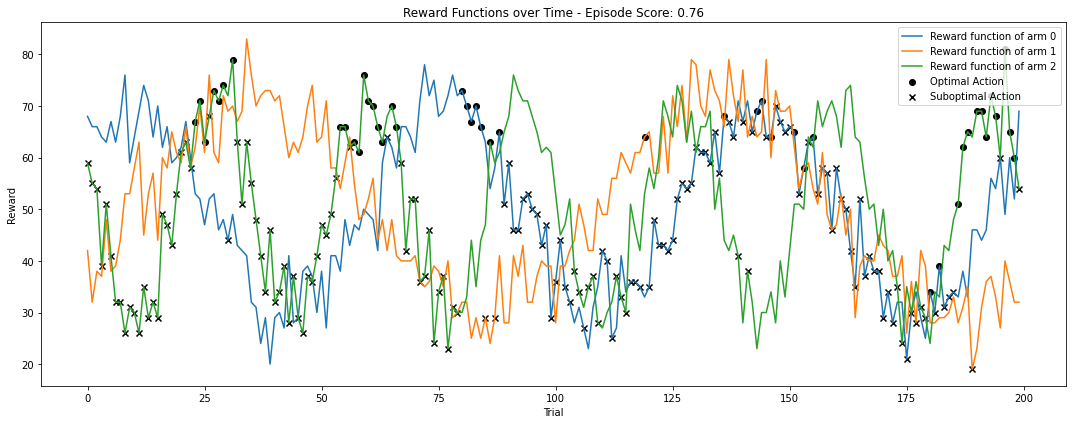

In [6]:
from Env import plot_restless_episode
# plot and visualize the agent's behavior over the reward functons using the plot_restless_episode function
##### INSERT YOUR CODE HERE! #####

In [7]:
from QLearningAgent import test_QlearningAgent
# Test the Q-learning agent over multiple episodes
##### INSERT YOUR CODE HERE! #####
print("Mean score: " , rsma_env.mean_score(all_episodes_rewards, all_episodes_bandits))

100%|██████████| 1000/1000 [00:29<00:00, 34.12it/s]

Mean score: 0.82
Mean score:  0.82


**Finding the best parameters**

Now that we have all the code set, we can try different parameters and test which are maximizing the agent's performance.
Initialize different agents with different learning rates, exploration rates, and initial Q-tables. Try to find an agent with a mean score larger than 87.5!


In [ ]:
# Try different learning rates, exploration rates, and initial Q-table values and plot how each effects the agent's performance
##### INSERT YOUR CODE HERE! #####

**Bonus: Exolore exploration methods!**

Try to implement a different exploration mechanism and see how it affects the agent's behavior!

In [ ]:
# Try different exploration mechanisms
##### INSERT YOUR CODE HERE! #####

# Deep RL
Deep Reinforcement Learning (Deep RL) is an application of Deep Learning in RL frameworks. The Deep Learning era that began in 2011 influenced RL enormously. Artificial neural networks were used to implement the policy or value functions, raising the Deep RL field. We deﬁne a deep RL system as any system that solves an RL problem (i.e. maximizes long-term reward), using representations that are themselves learned by a deep neural network (rather than stipulated by the designer). Deep RL frameworks are widely used in different applications, such as robotics and Atari games, and show outstanding results in various tasks. With that being said, there is still a big gap between the behavior of the Deep RL agent and human behavior. 

<img src="Tutorial_images/deep_rl_img.jpg" alt="Logo" width="1800" height="700">


Most of the classic RL algorithms have Deep RL versions, e.g., the deep version of Q-learning is called Deep Q Network (DQN), which you will learn about in the next video lecture.

<div class="alert alert-block alert-info">
<b>View the lecture!</b>

View the [Deep Q-learning video lecture](https://www.youtube.com/watch?v=wrBUkpiRvCA&list=PLZbbT5o_s2xoWNVdDudn51XM8lOuZ_Njv&index=11)!
</div>

As you should already know from viewing the previous tutorials, there are several types of RL algorithms. The policy gradient algorithms try to directly calculate the policy that maximizes the expected reward, while the value-based algorithms try to estimate some value function, like the Q-learning algorithm. Another type of algorithm that is widely used is the actor-critic, which tries to both estimate a value function and learn the policy. Now we are going to implement a Deep RL actor-critic model, so let's zoom in on some of its details.

# Actor Critic 
The actor-critic algorithm combines value-based and policy-based approaches, with two components: the actor, which is the policy that decides which action should be taken, and the critic, which is the value function estimation. The critic informs the actor how good the action was and how it should adjust. When talking about actor-critic within Deep RL, each of the components will be represented by some neural network that will be trained together.

We will implement a version of the actor-critic called Advantage Actor-Critic (known as A2C). The architecture of the model is very simplistic and shallow. It contains an LSTM layer followed by two fully connected layers. One is the critic that outputs the value estimation of the current trial, and the other is the actor that outputs a probability for each action.

We will go into more details of the network and training implementation in the next chapter, but you should have a look at it now to better grasp the idea. We will move on to implementing the loss function!

![logo](Tutorial_images/model_fig.jpg)


Now we will dive into the details of the loss function of the A2C model:

**Cumulative Discounted Return:**

$$R_t = r_t + \gamma R_{t+1}$$


**Advantage:** 

$$A_t = R_t - \hat{V}_t$$


**Actor Loss:**

$$-\sum_t \log \pi(a_t|s_t) A_t$$


**Critic Loss:**

$$\frac{1}{2} \sum_t (A_t)^2$$


**Entropy (Exploration Term):**

$$-\sum_t \pi(a_t|s_t) \log \pi(a_t|s_t)$$


**Overall Loss:**

$$\beta_c \cdot \text{Critic Loss} + \text{Actor Loss} - \beta_e \cdot \text{Entropy}$$


Let's go over it step by step.

The cumulative discounted return represents the total reward from the current time step onward, taking into account future rewards with a discount to prioritize immediate rewards.

The advantage term indicates how much better or worse an action performed compared to the expected outcome, helping to guide the policy update by comparing the actual return to the predicted value.

The actor loss is used to update the policy by penalizing the log probability of actions based on their advantage, encouraging the selection of actions that yield higher advantages.

The critic loss quantifies the error in the value function estimation by measuring the squared difference between the predicted and actual advantages, helping to improve the value predictions.

The entropy term promotes exploration by adding a penalty for low entropy (i.e., certainty), encouraging the policy to explore a wider range of actions.

The overall loss combines the critic loss, actor loss, and entropy term, balancing value estimation accuracy, policy improvement, and exploration to optimize the learning process. We have hyper parameters to control the entropy and critic effect.


<div class="alert alert-block alert-info">
<b>Implement code!</b>
Now you are all set and ready to implement the 'compute_loss' function in the train.py file! Remember to implement with torch tensors and not numpy arrays as we are now implementing a Neural Network model :)
</div>

# LSTM 

Long Short-Term Memory (LSTM) is a type of Recurrent Neural Network (RNN) design. In RNN design, we have a recurrent connection such that we will have a loop of a layer to itself. This loop allows maintaining information from the past, making RNNs ideal for sequential data. LSTM is a special kind of RNN that is capable of learning both short and long-term dependencies.


<div class="alert alert-block alert-info">
<b>View the tutorial!</b>

Please view this [LSTM video lecture](https://www.youtube.com/watch?v=8HyCNIVRbSU) or read this [blog](https://colah.github.io/posts/2015-08-Understanding-LSTMs).
</div>


Now we can implement our neural network! Just a few notes before:
* Use the log softmax for stability.
* Keep your hidden states and pass them from episode to episode during training to help convergence.
* Notice there is no need for an explicit exploration mechanism in the 'choose' function, as we are already using an entropy term in our loss function.


<div class="alert alert-block alert-info">
<b>Implement code!</b>
Implement the 'ActorCriticAgent' class in 'ActorCriticAgent.py' file!
</div>

# Train the model

So now we are getting to the fun part! Implement the 'run_episode' and 'train' functions in the train.py file. A few notes that might help:

* The 'run_episode' function shares some of its structure with the Q-learning 'run_episode' function, so be sure to take another look there before implementing everything from scratch :)
* When feeding the state to the model in 'run_episode', use the 'double_unsqueeze' function from utils.py to have the right input dimensions for the model.
* The overall idea of the training is to run an episode each iteration, compute the loss over the whole episode, and optimize the model.
* We will use a configuration dictionary with all hyperparameters for the training as you can see below.
* Our environment for the training will have different reward functions, and we will use the previous reward functions for testing.
* We will not check the model over the test data during training as done in supervised learning because, in our case, our environment is quite dynamic, and we are less concerned about overfitting.


<div class="alert alert-block alert-info">
<b>Implement code!</b>
Implement the `run_episode` and `train` functions in the train.py file!
</div>

In [8]:
# initialize the cfg dictionary with the hyperparameters
cfg = {    
    "reward_gamma": #set the reward gamma ,
    "beta_critic" : #set the beta critic,
    "beta_entropy" : #set the beta entropy,
    "hidden_size" : 48,
    "optimizer_lr": 0.001,
    "scheduler_params": {"step_size":100000, "gamma":0.1},
    "use_scheduler": 1
}

In [9]:
# create an environment with the training reward functions
from utils import load_training_reward_functions
training_reward_functions = load_training_reward_functions()
training_rsma_env = RestlessMultiArmedBandit(training_reward_functions)
initial_state = training_rsma_env.reset()

In [10]:
from ActorCriticAgent import ActorCriticAgent
# initialize the agent with the cfg dictionary
##### INSERT YOUR CODE HERE! #####

After you implemented the 'train_episode' function, validate it by running it!

In [11]:
from train import run_episode
from utils import device
initial_state = training_rsma_env.reset()
hidden_states = (torch.zeros(1,1,cfg['hidden_size'],dtype=torch.float32, device = device ), torch.zeros(1,1,cfg['hidden_size'],dtype=torch.float32, device = device )) 
# run episode
##### INSERT YOUR CODE HERE! #####

If you implemented the 'train' function, now we can train the model!

First, try to train it over only a few episodes to make sure it works well.

Notice to use the tensorboard writer in order to view your model trainnig progress!
If you are not familiar with tensorboard, well, it is one of the most used tools for training a deep neural network - view the torch documentation for more details.


In [12]:
from train import train
num_episodes = 10
print_every = 10
write = True
# train the agent
##### INSERT YOUR CODE HERE! #####

 20%|██        | 2/10 [00:00<00:01,  4.99it/s]

Episode 0  Accuracy: 0.77  Loss: 226737.09


100%|██████████| 10/10 [00:01<00:00,  5.32it/s]


## Launch Tensorboard

 [Tensorboard](https://pytorch.org/tutorials/intermediate/tensorboard_tutorial.html) is a visualization tool that allows you to monitor and analyze the performance of your models by displaying metrics like loss, accuracy, and computational graphs in an interactive web interface.

### Launch Tensorboard via terminal

* Open a terminal in the JupyterHub: This can be done from the JupyterHub homa page under the 'new' button. 
* Activate the aihub_env enviroment: In the terminal run 'conda activate /home/projects/aihubadm/Conda/aihub_env'.
* Copy the tensorboard logs directory path: The directory is called 'runs' and it should appear within the exercise directory after you run train() for the first time.
* Run tensorboard with the logs directory: In the terminal run: 'tensorboard --logdir ENTER_RUNS_DIR_PATH_HERE --bind_all
* Copy the html address you recived in the last line to a new browser tab, it would be something like 'http://accessv03.wexac.weizmann.ac.il:6006/'


## Launch tensorboard within VScode

If you are running this notebook via VScode you can launch Tensorboard using the command palette.
Visit the [VScode website](https://code.visualstudio.com/docs/datascience/pytorch-support#_tensorboard-integration) for more information.

## Test the model

For the model to be able to learn the task, it will need to train over many iterations. A GPU will not help much here as our data is small and sequential, but try to run on a device with a decent CPU.

Use 'save_checkpoint' for saving your trained models, so you can load them later.


In [7]:
# run and save model
from utils import save_checkpoint
fname = 'model_1'
save_checkpoint(fname, trained_model,final_hidden_states, cfg)

After the model is doing well on the training data, let's check it over the test data!

In [14]:
# Test the trained model with test reward functions:

# Load the reward function
reward_functions = load_reward_functions()
# Intialize the environment
rsma_env = RestlessMultiArmedBandit(reward_functions)

# run a test episode with the trained model
trained_model.eval()
with torch.no_grad():
    initial_state = rsma_env.reset()
    actions_log_probs, values, episode_rewards, episode_actions, hidden_states  = run_episode(initial_state, final_hidden_states, trained_model, rsma_env)

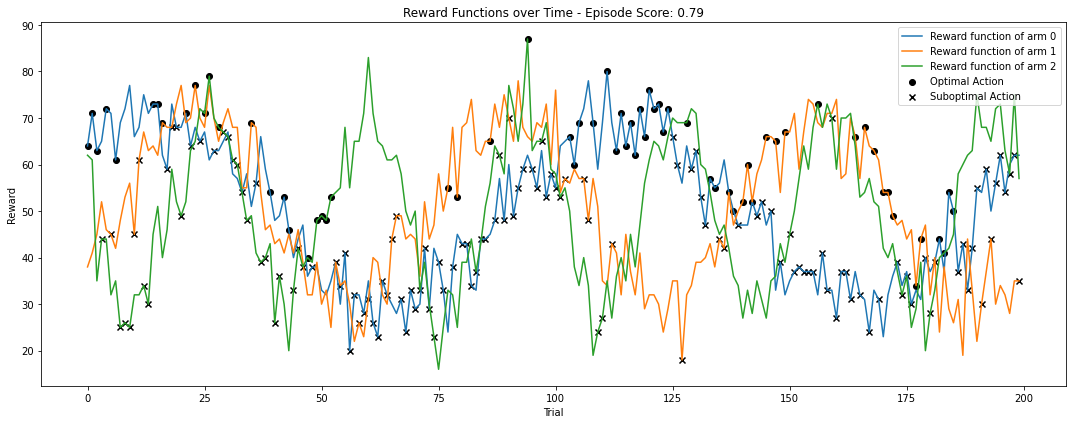

In [15]:
# plot and visualize the Actor-critic agent's behavior over the reward functons using the plot_restless_episode function
# Notice if you insert tensors or numpy arrays to the plot_restless_episode function
##### INSERT YOUR CODE HERE! #####

# Model's likelihood of subjects' behavior

Here you can see how much your model is likely to explain each subject's behavior.

In [16]:
# load subj df
from Likelihood import load_all_subj_df
all_subj_df = load_all_subj_df()
N_SUBJ = len(all_subj_df)

In [17]:
from Likelihood import calc_likelihood, load_all_subj_overall_performance
all_subj_overall_performance = load_all_subj_overall_performance()
all_subj_likelihood = np.zeros(N_SUBJ)
for subj in range(N_SUBJ):
    all_subj_likelihood[subj] = calc_likelihood(all_subj_df[subj].choice.to_numpy()-1,all_subj_df[subj].FB.to_numpy(), trained_model, cfg)

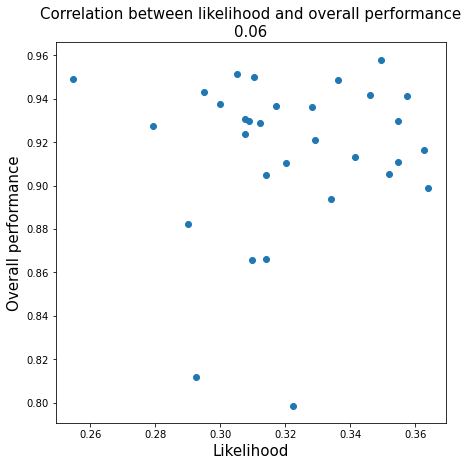

In [18]:
# If the model has learned well, we will see a correlation between the likelihood of the model to explain a subject behavior, and the subject's overall performance
fig = plt.figure(figsize=(7,7))
plt.scatter(all_subj_likelihood, all_subj_overall_performance)
plt.xlabel('Likelihood', fontsize=15)
plt.ylabel('Overall performance', fontsize=15)
plt.title('Correlation between likelihood and overall performance\n{:.2f}'.format(np.corrcoef(all_subj_likelihood, all_subj_overall_performance)[0,1]), fontsize=15)
plt.show()